# Regressão Linar usando o Statsmodel

* Instalando o Statsmodels


In [1]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* Importando o módulo do python





In [3]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Verificando a versão do pacote
sm.__version__

'0.10.2'

* Importando os dados

In [6]:
import pandas as pd

dados_treino = pd.read_csv('/content/train.csv')
dados_treino.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


* Separando as variáveis

In [7]:
X = dados_treino['x']
Y = dados_treino['y']

* Adicionando 1s no X

In [9]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,x
0,1.0,24.0
1,1.0,50.0
2,1.0,15.0
3,1.0,38.0
4,1.0,87.0
...,...,...
695,1.0,58.0
696,1.0,93.0
697,1.0,82.0
698,1.0,66.0


* Instanciando o modelo

In [10]:
modelo = sm.OLS(endog = Y,exog = X,missing = 'drop')

In [11]:
modelo

* Fazendo o ajuste do modelo aos dados

In [12]:
resultados = modelo.fit()

In [13]:
resultados.params

const   -0.107265
x        1.000656
dtype: float64

* Validação dos resultados atráves do resumo e gráfico

In [14]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:49:10   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.212     -0.506      0.6

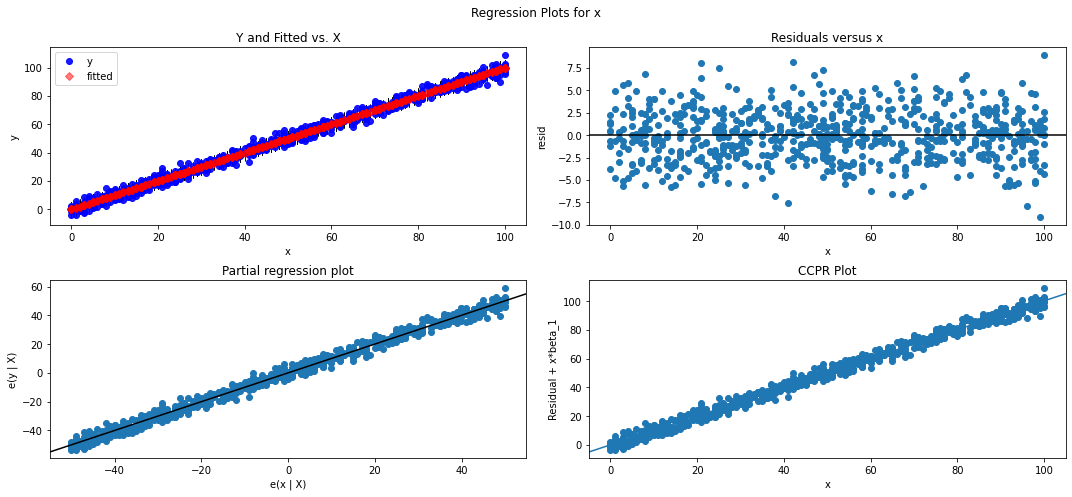

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))
fig = sm.graphics.plot_regress_exog(resultados,'x',fig=fig)

----------------------------------------------------

*  Maneira de fazer Regressão Linear, com o uso de fórumlas

In [15]:
import statsmodels.formula.api as smf

In [21]:
modelo1 = smf.ols(formula = 'y ~ x', data= dados_treino)

In [22]:
resultados = modelo1.fit()

In [23]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:00:53   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1073      0.212     -0.506      0.6

---------------------------

* Outra maneira de criar o modelo, atráves de fórmulas

In [24]:
modelo3 = sm.OLS.from_formula(formula = 'y ~ x',data=dados_treino)

In [25]:
resultados2 = modelo3.fit()

In [26]:
resultados2.params

Intercept   -0.107265
x            1.000656
dtype: float64

In [27]:
print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:03:04   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1073      0.212     -0.506      0.6